In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19/train.csv


In [2]:
#let us start by reading the data using pandas
data = pd.read_csv ("../input/covid19/train.csv")

In [3]:
#lets look at how our data looks like for the first few rows
data.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [4]:
#lets look at how our data looks like for the last several rows
data.tail()

,Territory X Date,target,cases,Territory,Date
10654,Zimbabwe X 3/8/20,0,0,Zimbabwe,3/8/20
10655,Zimbabwe X 3/9/20,0,0,Zimbabwe,3/9/20
10656,Zimbabwe X 3/10/20,0,0,Zimbabwe,3/10/20
10657,Zimbabwe X 3/11/20,0,0,Zimbabwe,3/11/20
10658,Zimbabwe X 3/12/20,0,0,Zimbabwe,3/12/20


In [5]:
#lets look at the unique names for the columns and from there also the unique values so as to drop unwanted data
list(data.columns)

['Territory X Date', 'target', 'cases', 'Territory', 'Date']

In [6]:
#dropping the repeated columns which are the last two
#repeated_columns_for_dropping = data[['Territory','Date']]
#data = data.drop(repeated_columns_for_dropping,axis = 1)

In [7]:
#lets look at the train data description to better understand the data
data.describe()

,target,cases
count,10659.000000,10659.000000
mean,8.624261,277.716015
std,140.033483,4177.200903
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3172.000000,80932.000000


In [8]:
print("Number of Territories: ", data['Territory'].nunique())
print("Dates go from day", max(data['Date']), "to day", min(data['Date']), ", a total of", data['Date'].nunique(), "days")
#our data has no states
#print("Countries with Province/State informed: ", data[data['Province/State'].isna()==False]['Country/Region'].unique())

Number of Territories:  209
Dates go from day 3/9/20 to day 1/22/20 , a total of 51 days


In [9]:
#let us look at these territories just to make sure that each stands on its own
print(data['Territory'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas (the)' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic (the)' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros (the)' 'Congo (the)' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao'
 'Cyprus' 'Czechia' "Côte d'Ivoire"
 "Democratic People's Republic of Korea (the)"
 'Democratic Republic of the Congo (the)' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic (the)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia (the)' 'Georgia' 'Germany' 'Ghana'
 

In [10]:
#from the above data we can see that each country appears only once 
#lets see the number of entries per Territory
data['Territory'].value_counts()

Chile                         51
Lesotho                       51
Indonesia                     51
India                         51
Vanuatu                       51
                              ..
United Arab Emirates (the)    51
Zimbabwe                      51
Aruba                         51
Nigeria                       51
Norway                        51
Name: Territory, Length: 209, dtype: int64

In [11]:
'''# produces Pandas Series
data.groupby('month')['duration'].sum() 
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()
'''

"# produces Pandas Series\ndata.groupby('month')['duration'].sum() \n# Produces Pandas DataFrame\ndata.groupby('month')[['duration']].sum()\n"

Text(0.5, 0, 'Date')

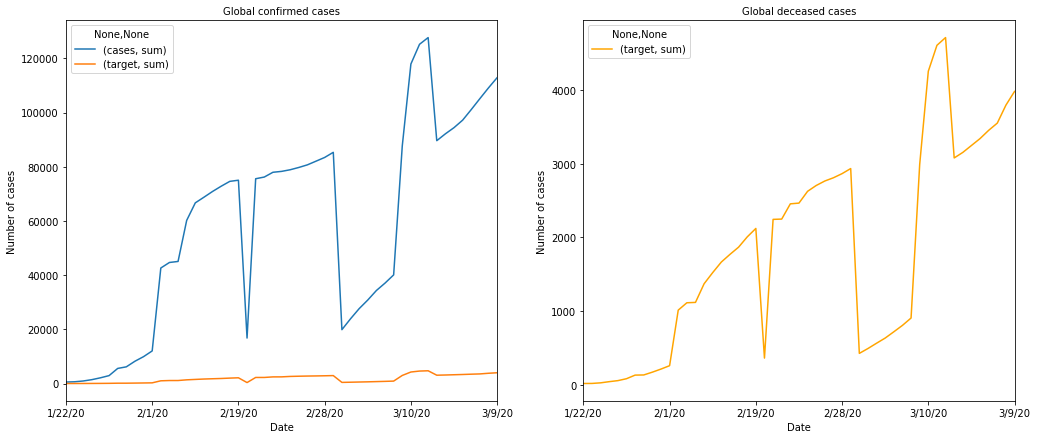

In [12]:
#lets check the number of deaths and infected confirmed cases by using plots
#importing the necessary dependency
import matplotlib.pyplot as plt

confirmed_total_date = data.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

we know that the virus originated from china so we can use this to compare with the China graph for both the confirmed cases against the deaths and check if the graphs flow the same remembering that during some time china changed how it considered whether somebody was considered positive (11/03/2020).This may be registered as a spike and considering other policies that are put in place that may likely affect the number of cases of the infected people.


Text(0.5, 0, 'Date')

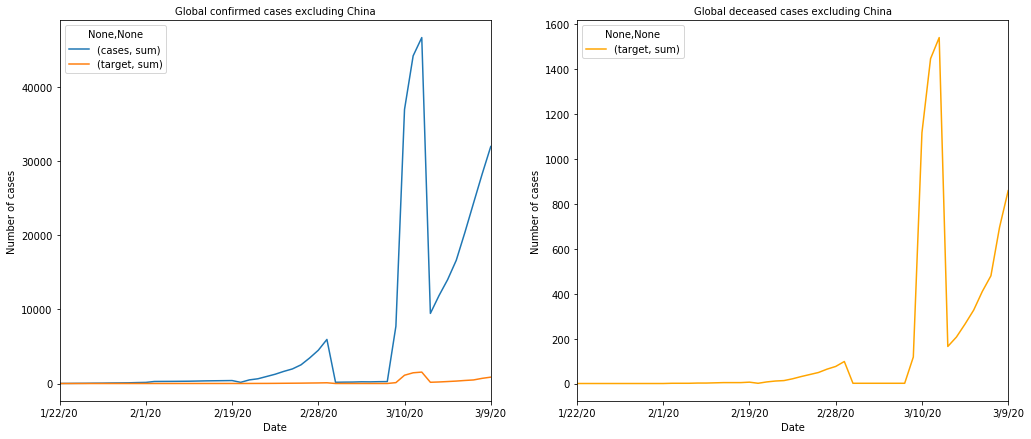

In [13]:
#lets draw the curve excluding china
confirmed_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Without China we should be getting a smoother curve as which more or less looks like the SIR model for epidemiology where there is a steep rise then a gentle drop in the number of cases but remember that unlike other countries that can learn from China,China had no prior warning of the contagion.

Text(0.5, 0, 'Date')

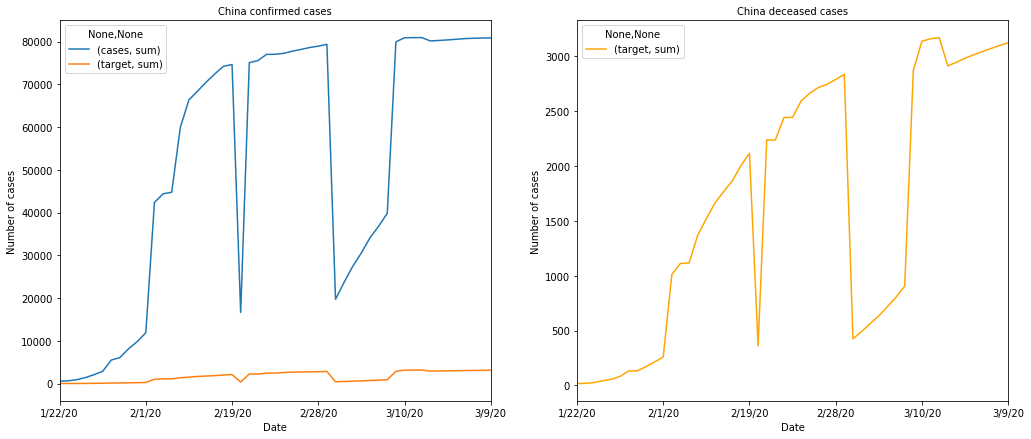

In [14]:
confirmed_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Text(0.5, 0, 'Date')

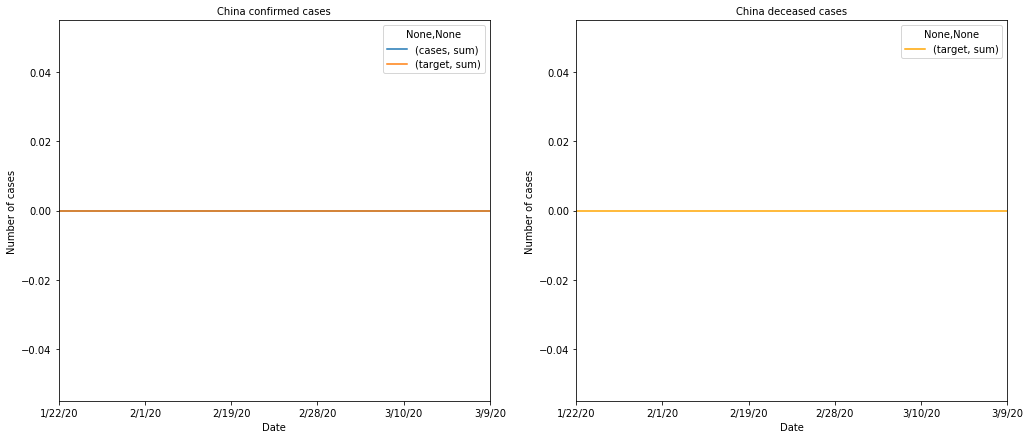

In [17]:
confirmed_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

"plt.subplot(2, 2, 5)\ntotal_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')"

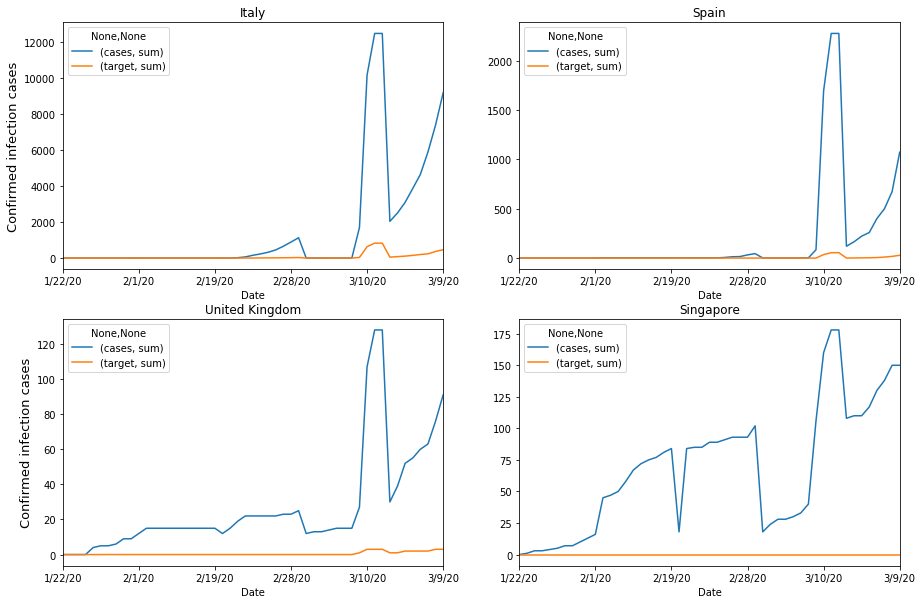

In [27]:
#looking at the worst hit countries as of now
#Italy
confirmed_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')